# 머신러닝 모델 비교

- 서포트벡터머신, 결정 트리, 랜덤 포레스트
- 교차 검증
- 모델은 분류(classification)와 회귀에 모두 사용된다
- WHO 수명 예측 데이터 사용

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.13.52.png?raw=1" align='left'  width=400>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.15.40.png?raw=1" align='left'  width=500>

## 데이터

## import 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score            #mean squared error 삭제   
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 데이터 읽기

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/Life%20Expectancy%20Data.csv")
data = data.dropna()
data.Status = data.Status.map({"Developing":0, "Developed":1})
df = data.copy()
data[:3]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


# 교차검증
- 훈련/검증 데이터 나누는 작업을 train_test_split을 사용하여 한번만 나누지 않고 전체 데이터를 대상으로 여러번 수행
- 다양한 조합의 훈련/검증 데이터로 검증함으로써 모델의 성능을 안정적으로 평가
- cross_val_score 함수를 사용
- 데이터를 랜덤하게 섞지 않고 아래 그림처럼 나누는 옵션도 있다 (shuffle=False)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.27.57.png?raw=1" align='left'  width=400>

In [6]:
def cross_validation(model, X, y, n=5): 
    cv = KFold(n, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

# 회귀 모델
- 스케일링을 하는 경우

In [7]:
y = df['Life expectancy ']

features = df.columns.difference(['Country','Life expectancy '])
X = df[features]
cont_features = X.columns.difference(['Status'])
X_sc = X.copy()
X_sc.loc[:,cont_features] = StandardScaler().fit_transform(X_sc[cont_features])
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=9)

In [8]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

In [9]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(8,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

## 선형 모델

In [10]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  12.46
Mean Absolute Error:  2.85
Root Mean Squared Error:  3.659
R-Squared:  0.832


In [11]:
cross_validation(linear_reg,X,y)

0.8337

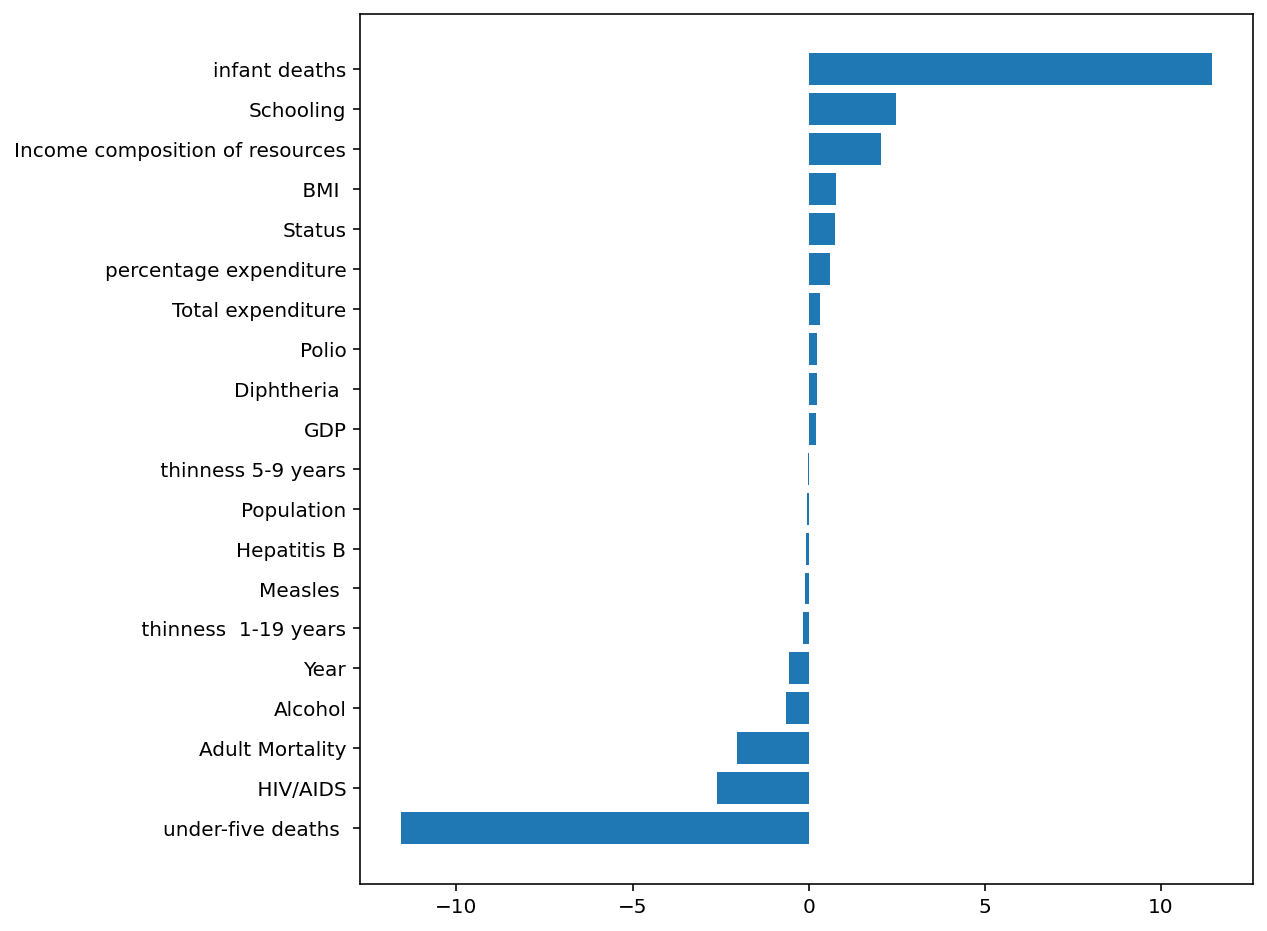

In [12]:
plot_feature_weight(X.columns, linear_reg.coef_)

## SVM
- 스케일링 하지 않으면 잘 동작하지 않는다.

In [13]:
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  13.951
Mean Absolute Error:  2.886
Root Mean Squared Error:  3.762
R-Squared:  0.822


In [14]:
# cross_validation(svr,X,y)

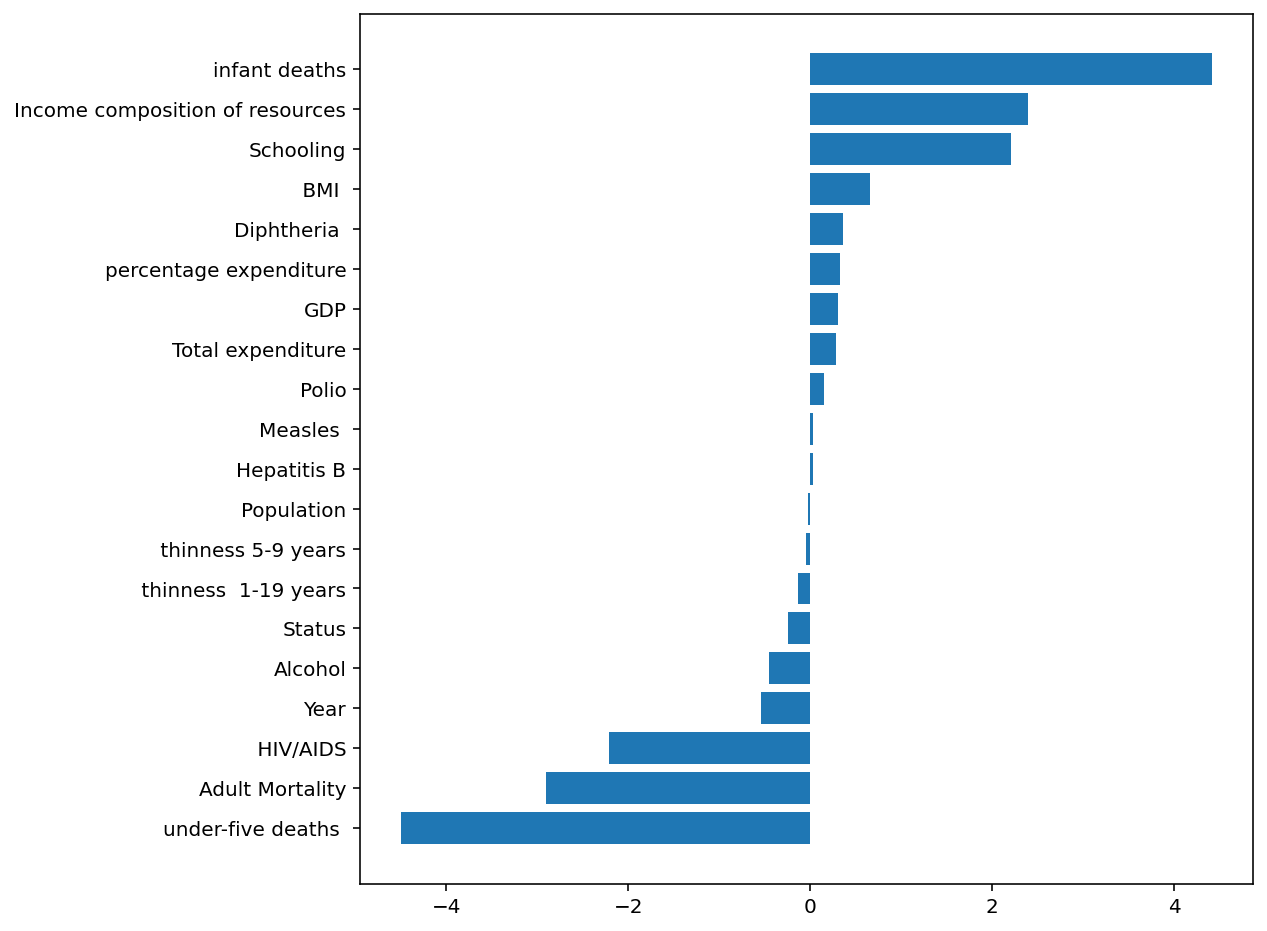

In [15]:
plot_feature_weight(X.columns, svr.coef_[0])

- SVM 개념
 - 선형모델을 개선한 모델 (마진이 있는 결정경계 설정)
 - 학습 샘플수가 적을 때 유용
 - 다차항을 추가한 커널 기법 도입으로 성능 개선

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.28.37.png?raw=1" align='left'  width=500>

## 결정트리
- 결정 트리를 회귀모델에 사용할 때는 나누어지는 하위 두 그룹의 분산이 가능한 작아지도록 나눈다
 - 즉, 회귀 대상의 수치가 가능한 비슷한 샘플들이 모이도록 나눈다
- 결정 트리를 분류에 사용할 때는 크로스엔트로피 (또는 지니지수)가 가능한 작아지도록 나눈다
 - 즉, 나누어진 그룹에 같은 그룹의 샘플이 모이는 것을 측정하여 순도(purity)가 가능한 높아지도록 나눈다


In [16]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  12.8
Mean Absolute Error:  1.578
Root Mean Squared Error:  2.59
R-Squared:  0.916


In [17]:
cross_validation(dtr,X,y)

0.919

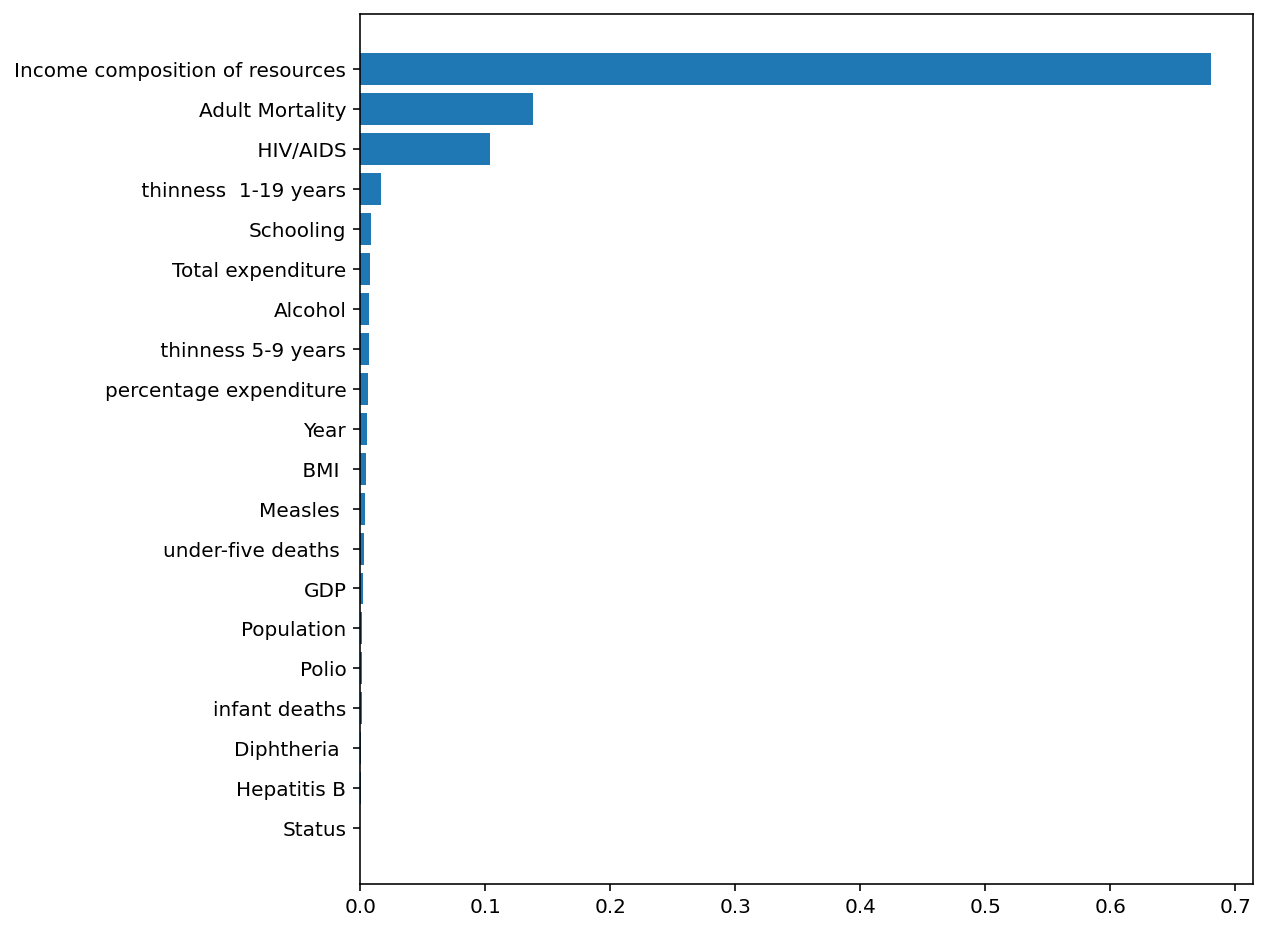

In [18]:
plot_feature_weight(X.columns, dtr.feature_importances_)

- 결정트리 보기

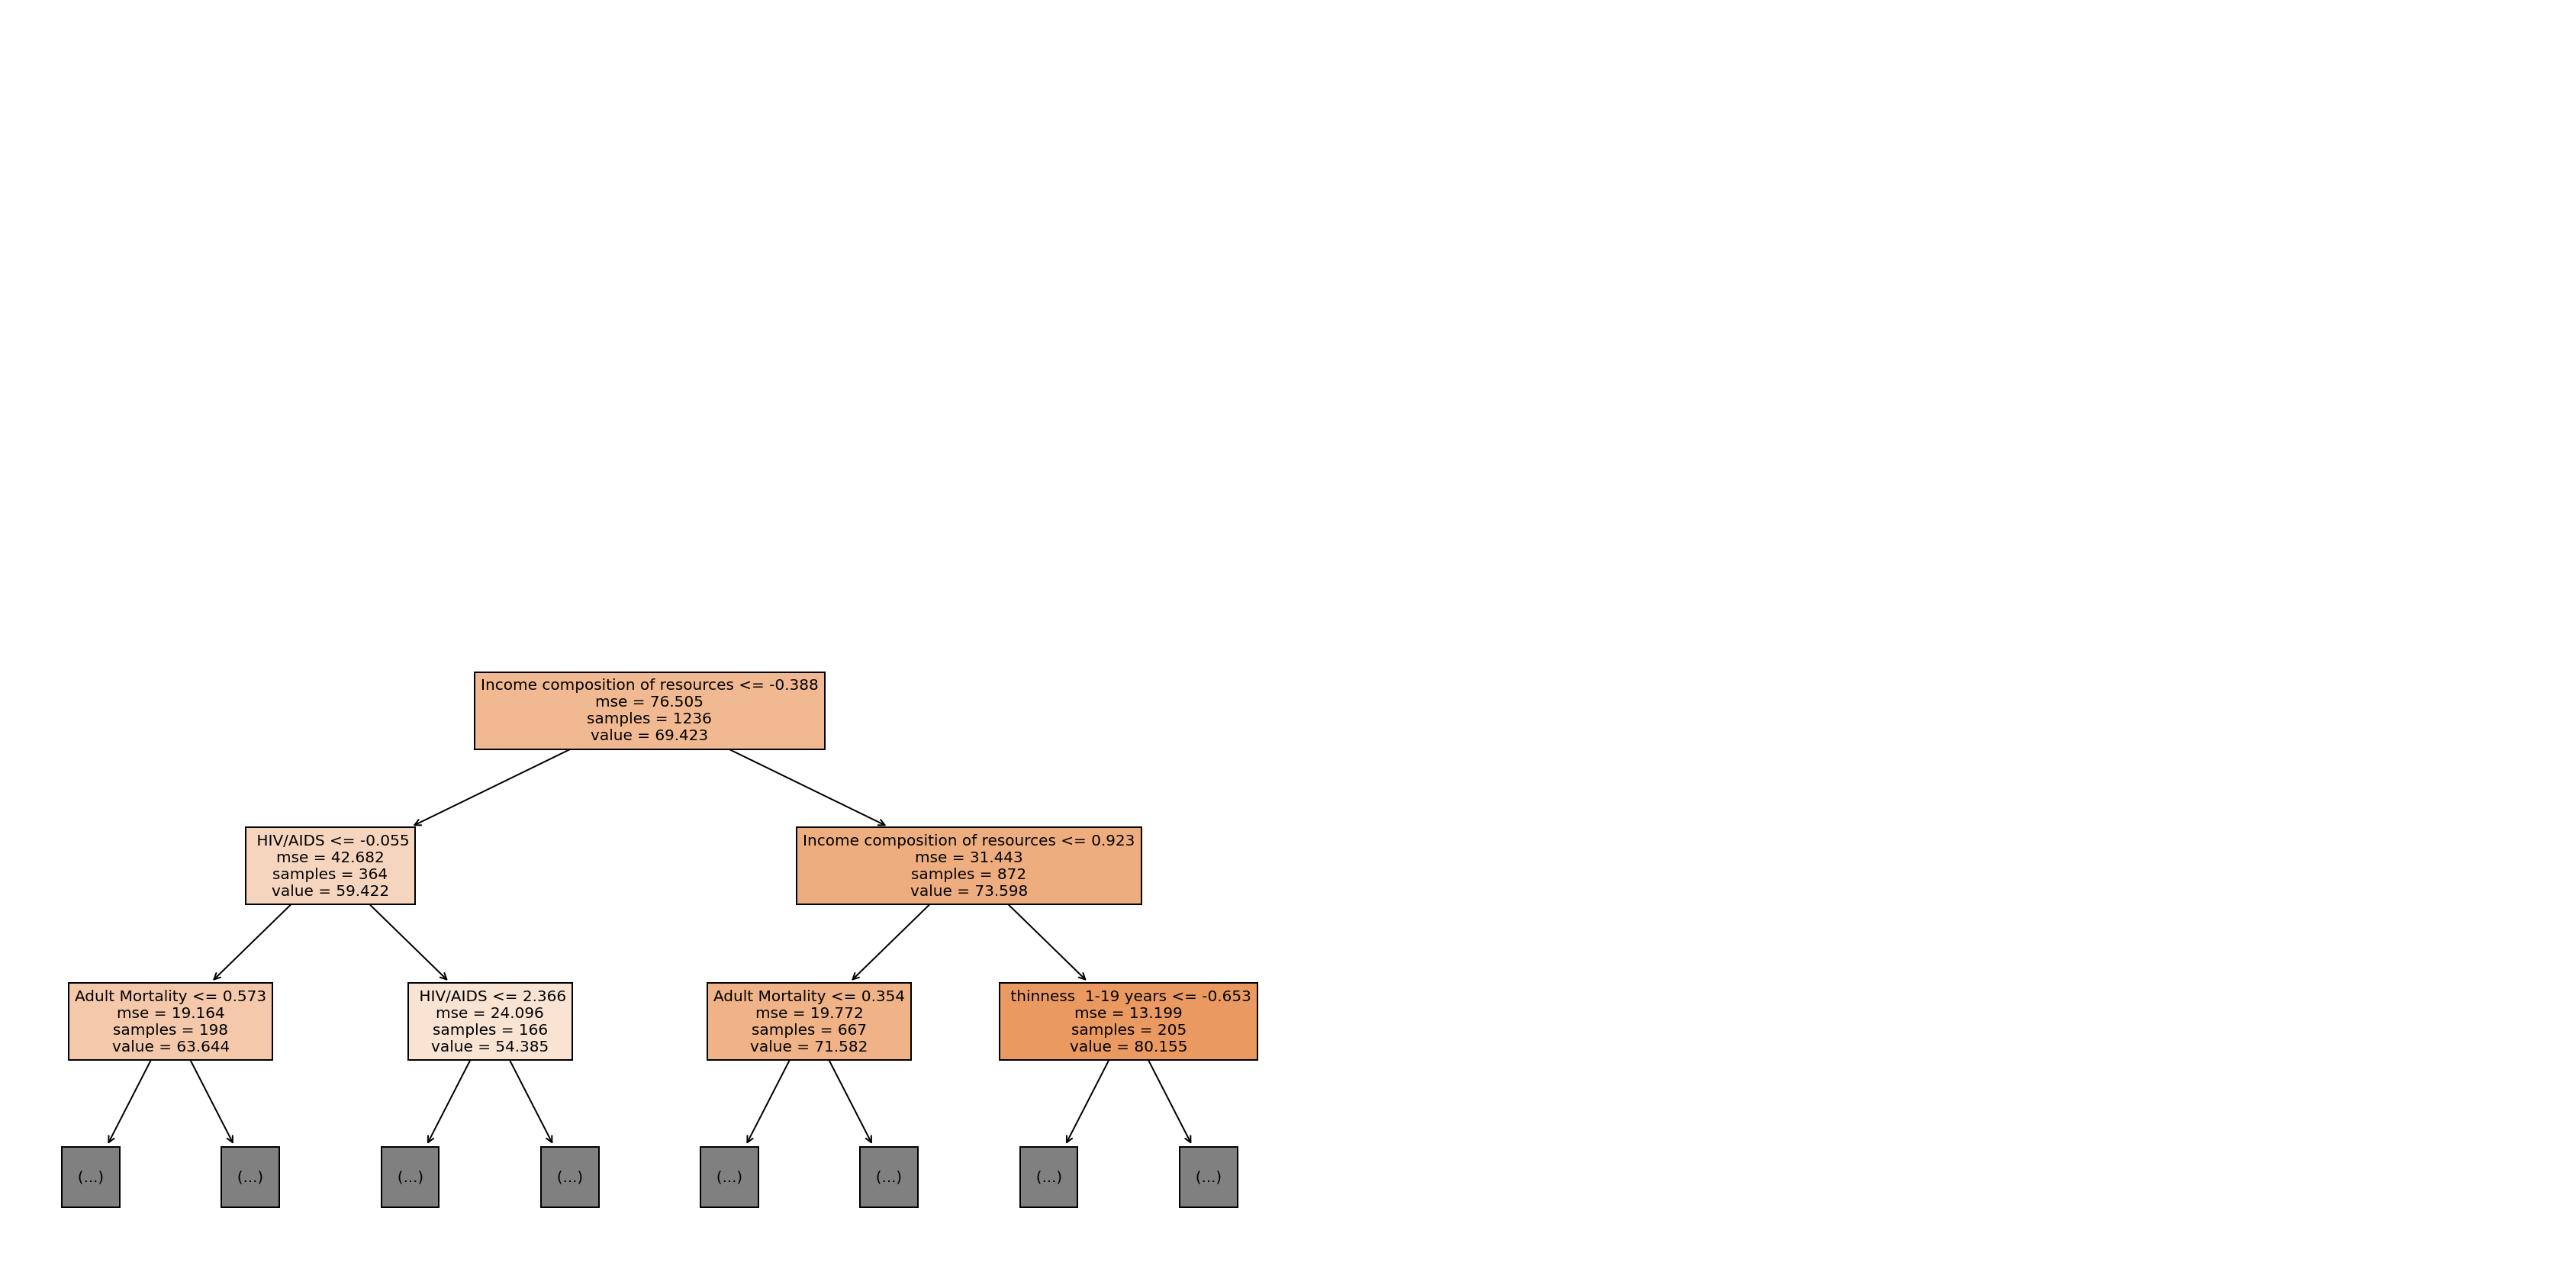

In [19]:
plt.figure(figsize=(30,15))
# plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtr, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [20]:
print(tree.export_text(dtr, feature_names=list(X.columns)))

|--- Income composition of resources <= -0.39
|   |---  HIV/AIDS <= -0.06
|   |   |--- Adult Mortality <= 0.57
|   |   |   |---  HIV/AIDS <= -0.22
|   |   |   |   |--- Schooling <= 0.12
|   |   |   |   |   |--- percentage expenditure <= -0.39
|   |   |   |   |   |   |--- Schooling <= -2.03
|   |   |   |   |   |   |   |--- percentage expenditure <= -0.39
|   |   |   |   |   |   |   |   |--- value: [61.40]
|   |   |   |   |   |   |   |--- percentage expenditure >  -0.39
|   |   |   |   |   |   |   |   |--- value: [56.20]
|   |   |   |   |   |   |--- Schooling >  -2.03
|   |   |   |   |   |   |   |--- Measles  <= -0.20
|   |   |   |   |   |   |   |   |--- Income composition of resources <= -0.75
|   |   |   |   |   |   |   |   |   |--- GDP <= -0.42
|   |   |   |   |   |   |   |   |   |   |---  thinness 5-9 years <= -0.79
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |---  thinness 5-9 years >  -0.79
|   |   |   |   |  

## 랜덤 포레스트

In [24]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  8.616
Mean Absolute Error:  1.218
Root Mean Squared Error:  1.914
R-Squared:  0.954


In [23]:
cross_validation(rfr,X,y)

0.9557

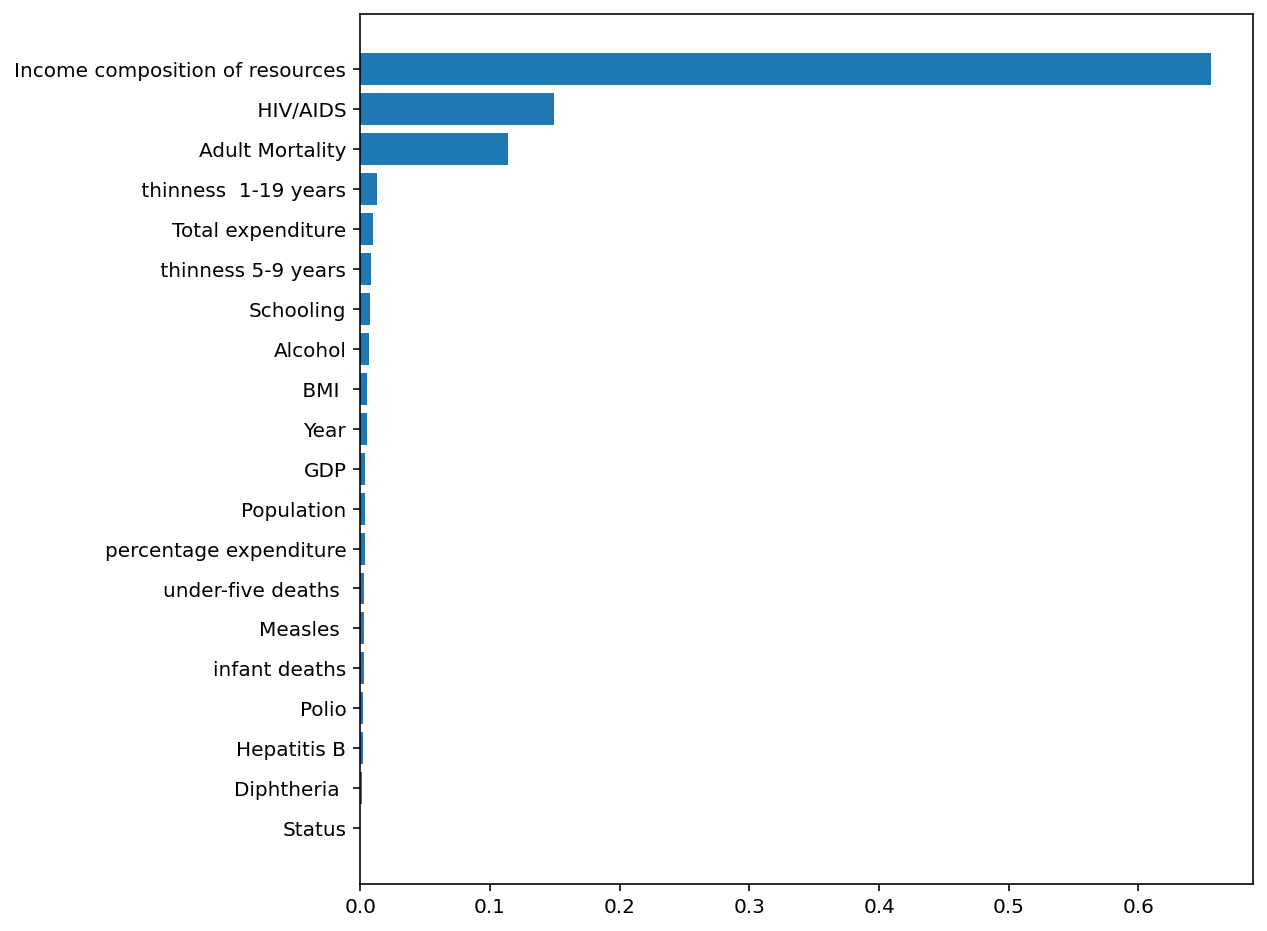

In [22]:
plot_feature_weight(X.columns, rfr.feature_importances_)

## 랜덤 포레스트 개념
- 결정 트리의 성능을 개선한 방법
- 간단한 구조의 결정 트리(weak learner)를 수십~수백개를 만들고 각 결정 트리의 동작 결과의 평균치를 구하는 방법
- 앙상블(ensemble) 방법이 하나의 모델만 만드는 것보다 좋은 성능을 보인다
- 각 결정 트리를 만들 때 훈련 데이터의 일부만 사용하거나 특성의 일부를 무작위로 선택하여 만든다 

- 랜덤 포레스트 개념

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.52.png?raw=1" align='left'  width=400>

- 소프트 투표

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.52.18.png?raw=1" align='left'  width=400>

## 부스팅 (LightGBM)

- 아래와 같이 설치해야 함
- !conda install lightgbm -y

In [25]:
lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  13.601
Mean Absolute Error:  1.198
Root Mean Squared Error:  1.98
R-Squared:  0.951


In [26]:
cross_validation(lgbm_r,X,y)

0.9575

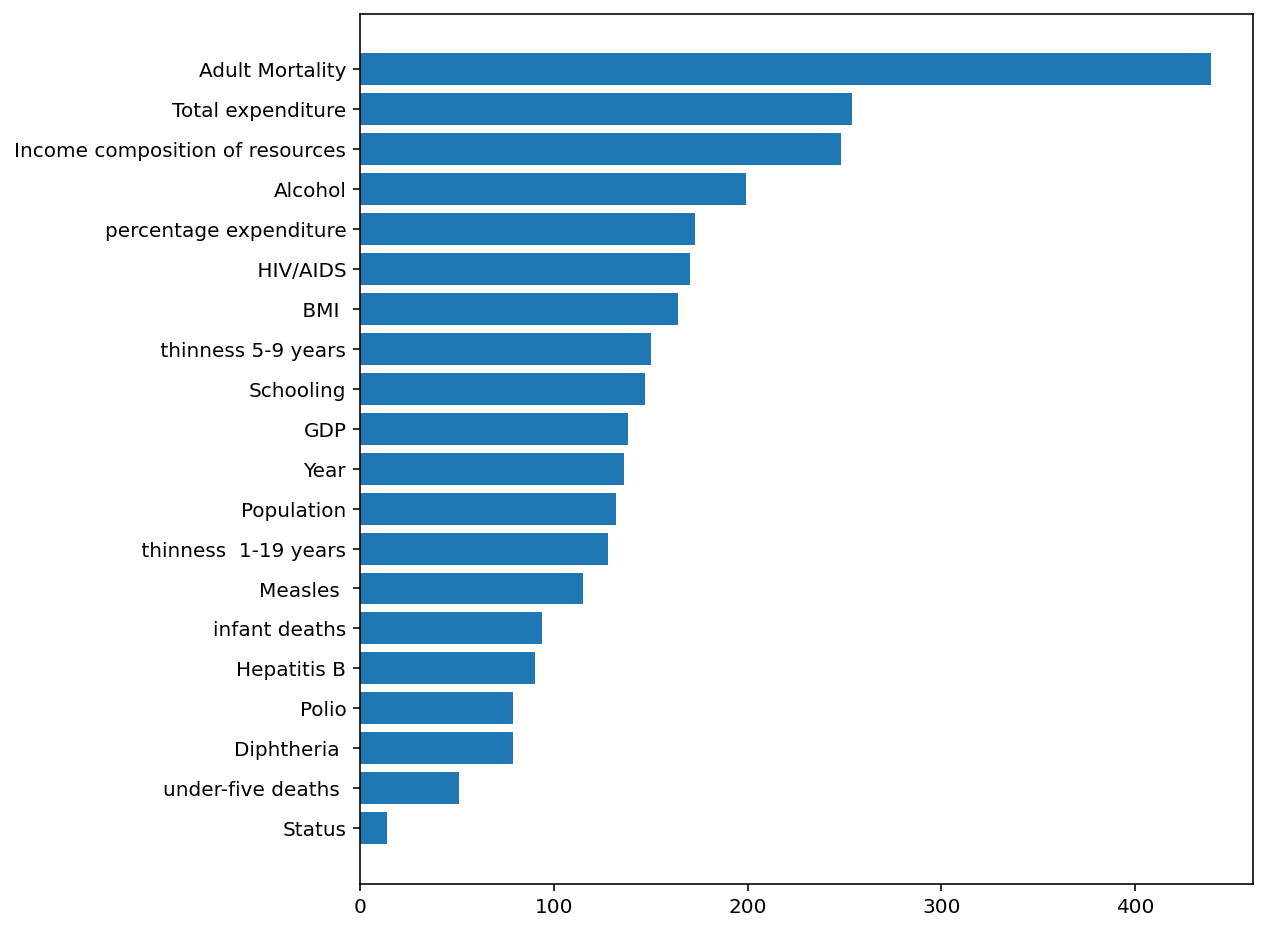

In [27]:
plot_feature_weight(X.columns, lgbm_r.feature_importances_)

## (예제) 스케일링 하지 않으면 성능이 달라지는지 확인해보시오
- 입력 데이터를 스케일링 한 경우와 하지 않은 경우의 성능을 비교하시오
- 성능에 변화가 있는 모델은 어떤 모델인가?

In [29]:
# (풀이)
y = df['Life expectancy ']

features = df.columns.difference(['Country','Life expectancy '])
X = df[features]
cont_features = X.columns.difference(['Status'])
#X_sc = X.copy()
X.loc[:,cont_features] = StandardScaler().fit_transform(X[cont_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)


lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  13.601
Mean Absolute Error:  1.198
Root Mean Squared Error:  1.98
R-Squared:  0.951


# 분류 모델

## 손실함수

### 엔트로피

- 확률 p인 사건의 가치:  $log$(${1}\over{p}$) 
- 엔트로피=확률x기대치: $Entropy(H)$ = $p$ $log$(${1}\over{p}$)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.32.23.png?raw=1" align='left'  width=200>


### 크로스 엔트로피 

- 분류에서 손실함수, 즉 학습을 하면서 줄여야 할 대상 값은 크로스 엔트로피를 사용한다
- 분류가 잘 수행될수록 (즉, 분류된 하위 그룹의 p가 1 또는 0으로 수렴할수록) 크로스 엔트로피의 합은 점차 줄어들며 이를 분류의 손실함수로 사용한다
- 계산량을 줄이기 위해서 크로스 엔트로피 대신 gini 계수를 주로 사용한다 (디폴트 값)

<img  src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.11.png?raw=1" align='left'  width=400>

- 크로스 엔트로피: 

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.29.58.png?raw=1" align='left'  width=150>

- gini 계수:

$1 - \sum {p_{i}}^2$

## 특성 중요도
- 결정트리, 랜덤포레스트, 부스팅 등 트리계열 모델에서 모델의 동작에 기여한 특성별 점수를 알려준다 (합이 1이 되는 수치로 환산)

## 분류: 개발 도상국인지를 분류 예측

In [30]:
y = df['Status']

features = df.columns.difference(['Country','Status'])
X = df[features]
X[:3]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Life expectancy,Measles,Polio,Population,Schooling,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,19.1,0.1,17.2,17.3,263.0,0.01,65.0,584.259210,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,8.16,2015,62,71.279624,83
1,18.6,0.1,17.5,17.5,271.0,0.01,62.0,612.696514,62.0,0.476,59.9,492,58.0,327582.0,10.0,8.18,2014,64,73.523582,86
2,18.1,0.1,17.7,17.7,268.0,0.01,64.0,631.744976,64.0,0.470,59.9,430,62.0,31731688.0,9.9,8.13,2013,66,73.219243,89


In [31]:
# cont_features = X.columns.difference(['Status'])
X_sc = X.copy()
X_sc.loc[:,:] = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y)

## 선형 모델

In [32]:
lin = SGDClassifier() # (1) 모델 생성
lin.fit(X_train, y_train) # (2) 훈련
lin.score(X_test, y_test) # (3) 평가 (정확도)

0.9297820823244553

In [33]:
cross_validation(lin,X,y)

0.8102

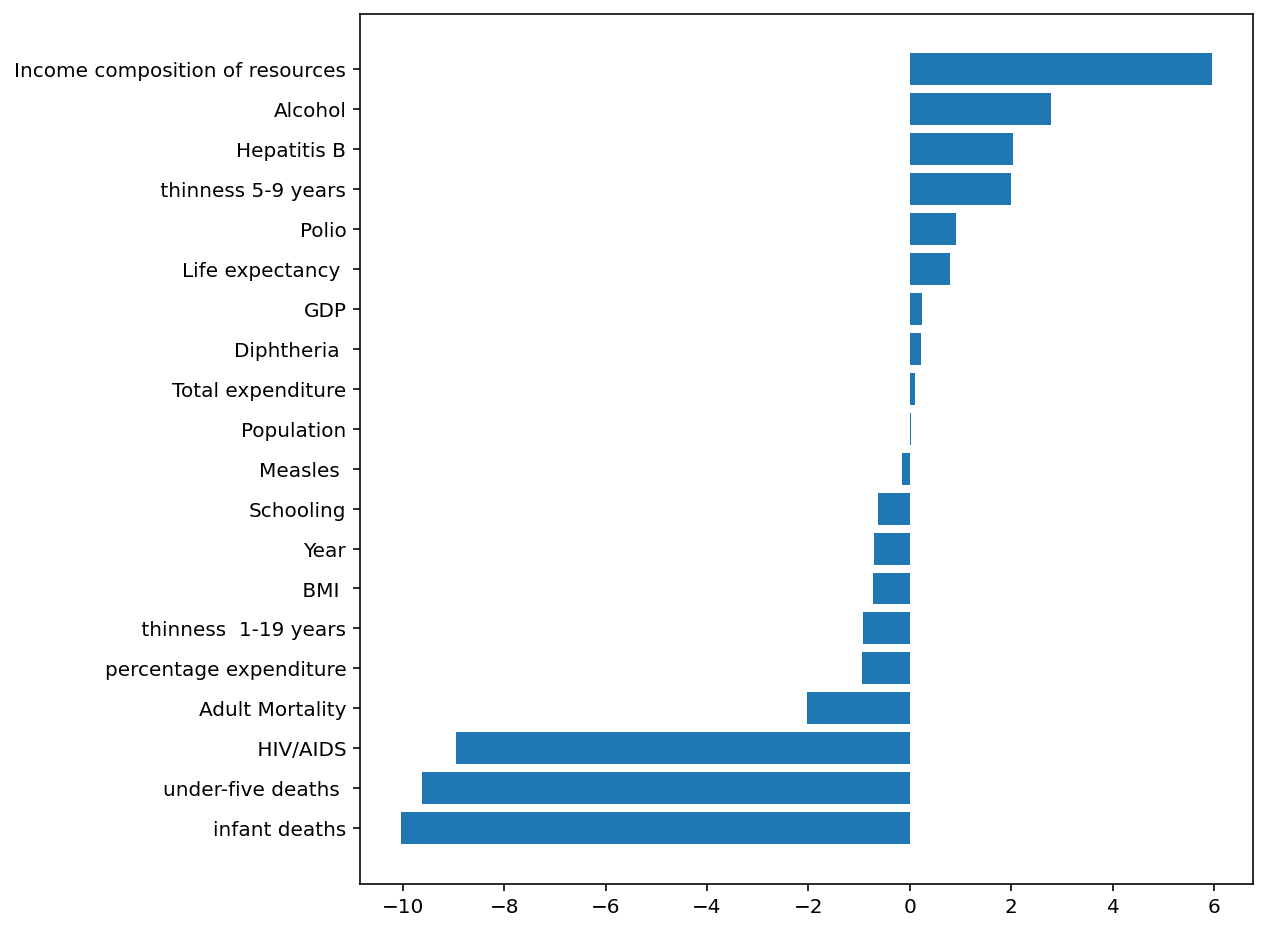

In [34]:
plot_feature_weight(X.columns, lin.coef_[0])

## SVM

In [38]:
# svc = SVC(kernel="linear")
# svc.fit(X_train, y_train)
# svc.score(X_test, y_test)

In [36]:
# cross_validation(svc,X,y)

In [37]:
# plot_feature_weight(X.columns, svc.coef_[0])

## 결정 트리

In [39]:
dtc = DecisionTreeClassifier() # (1) 모델 생성
dtc.fit(X_train, y_train) # (2) 훈련
dtc.score(X_test, y_test) # (3) 평가 (정확도)

0.9661016949152542

In [40]:
cross_validation(dtc,X,y)

0.9715

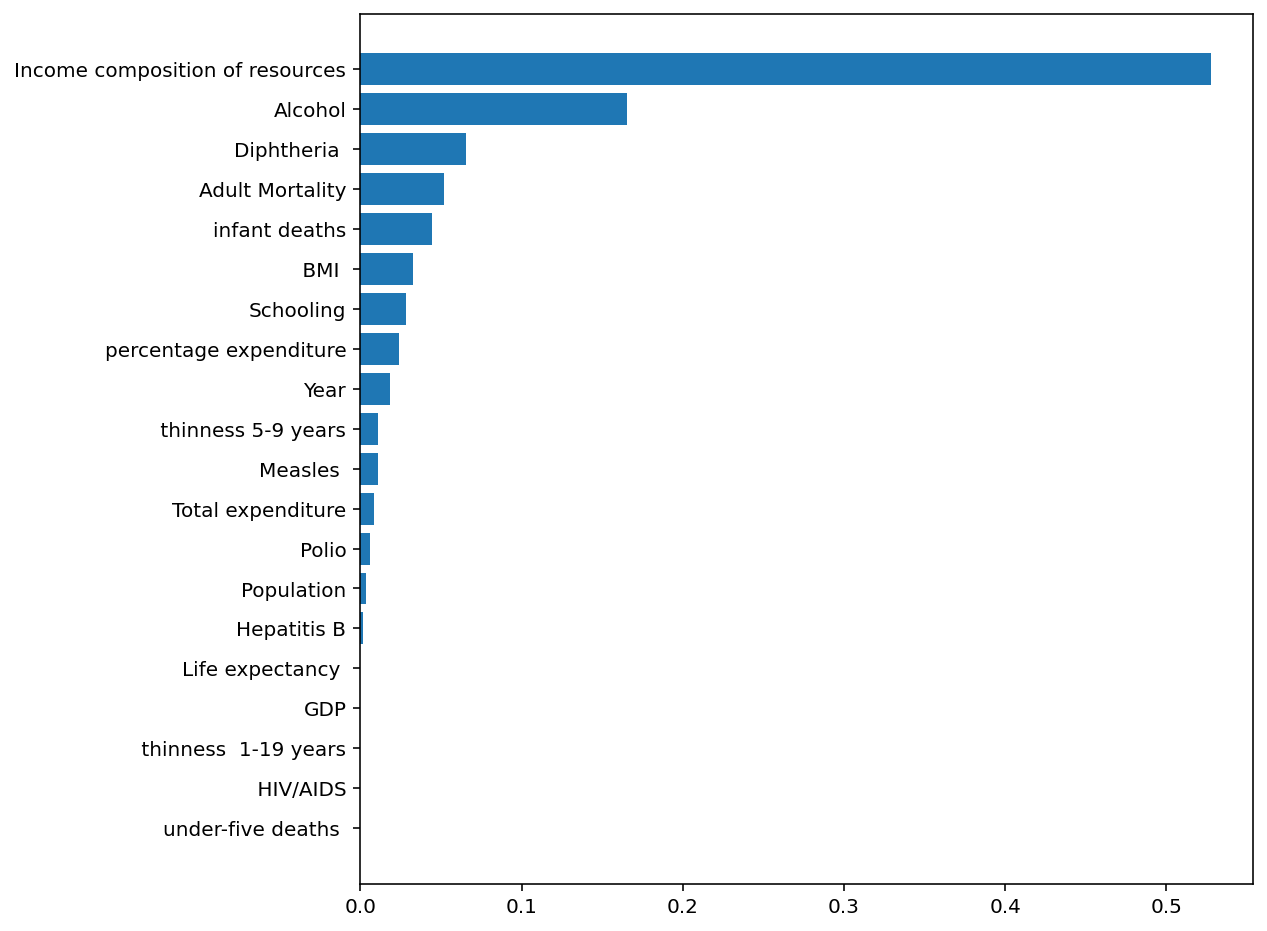

In [41]:
plot_feature_weight(X.columns, dtc.feature_importances_)

In [42]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [43]:
y_pred = dtc.predict(X_test)
show_clf_result(y_test, y_pred)

[[344   9]
 [  5  55]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       353
           1       0.86      0.92      0.89        60

    accuracy                           0.97       413
   macro avg       0.92      0.95      0.93       413
weighted avg       0.97      0.97      0.97       413



- 결정 트리 보기

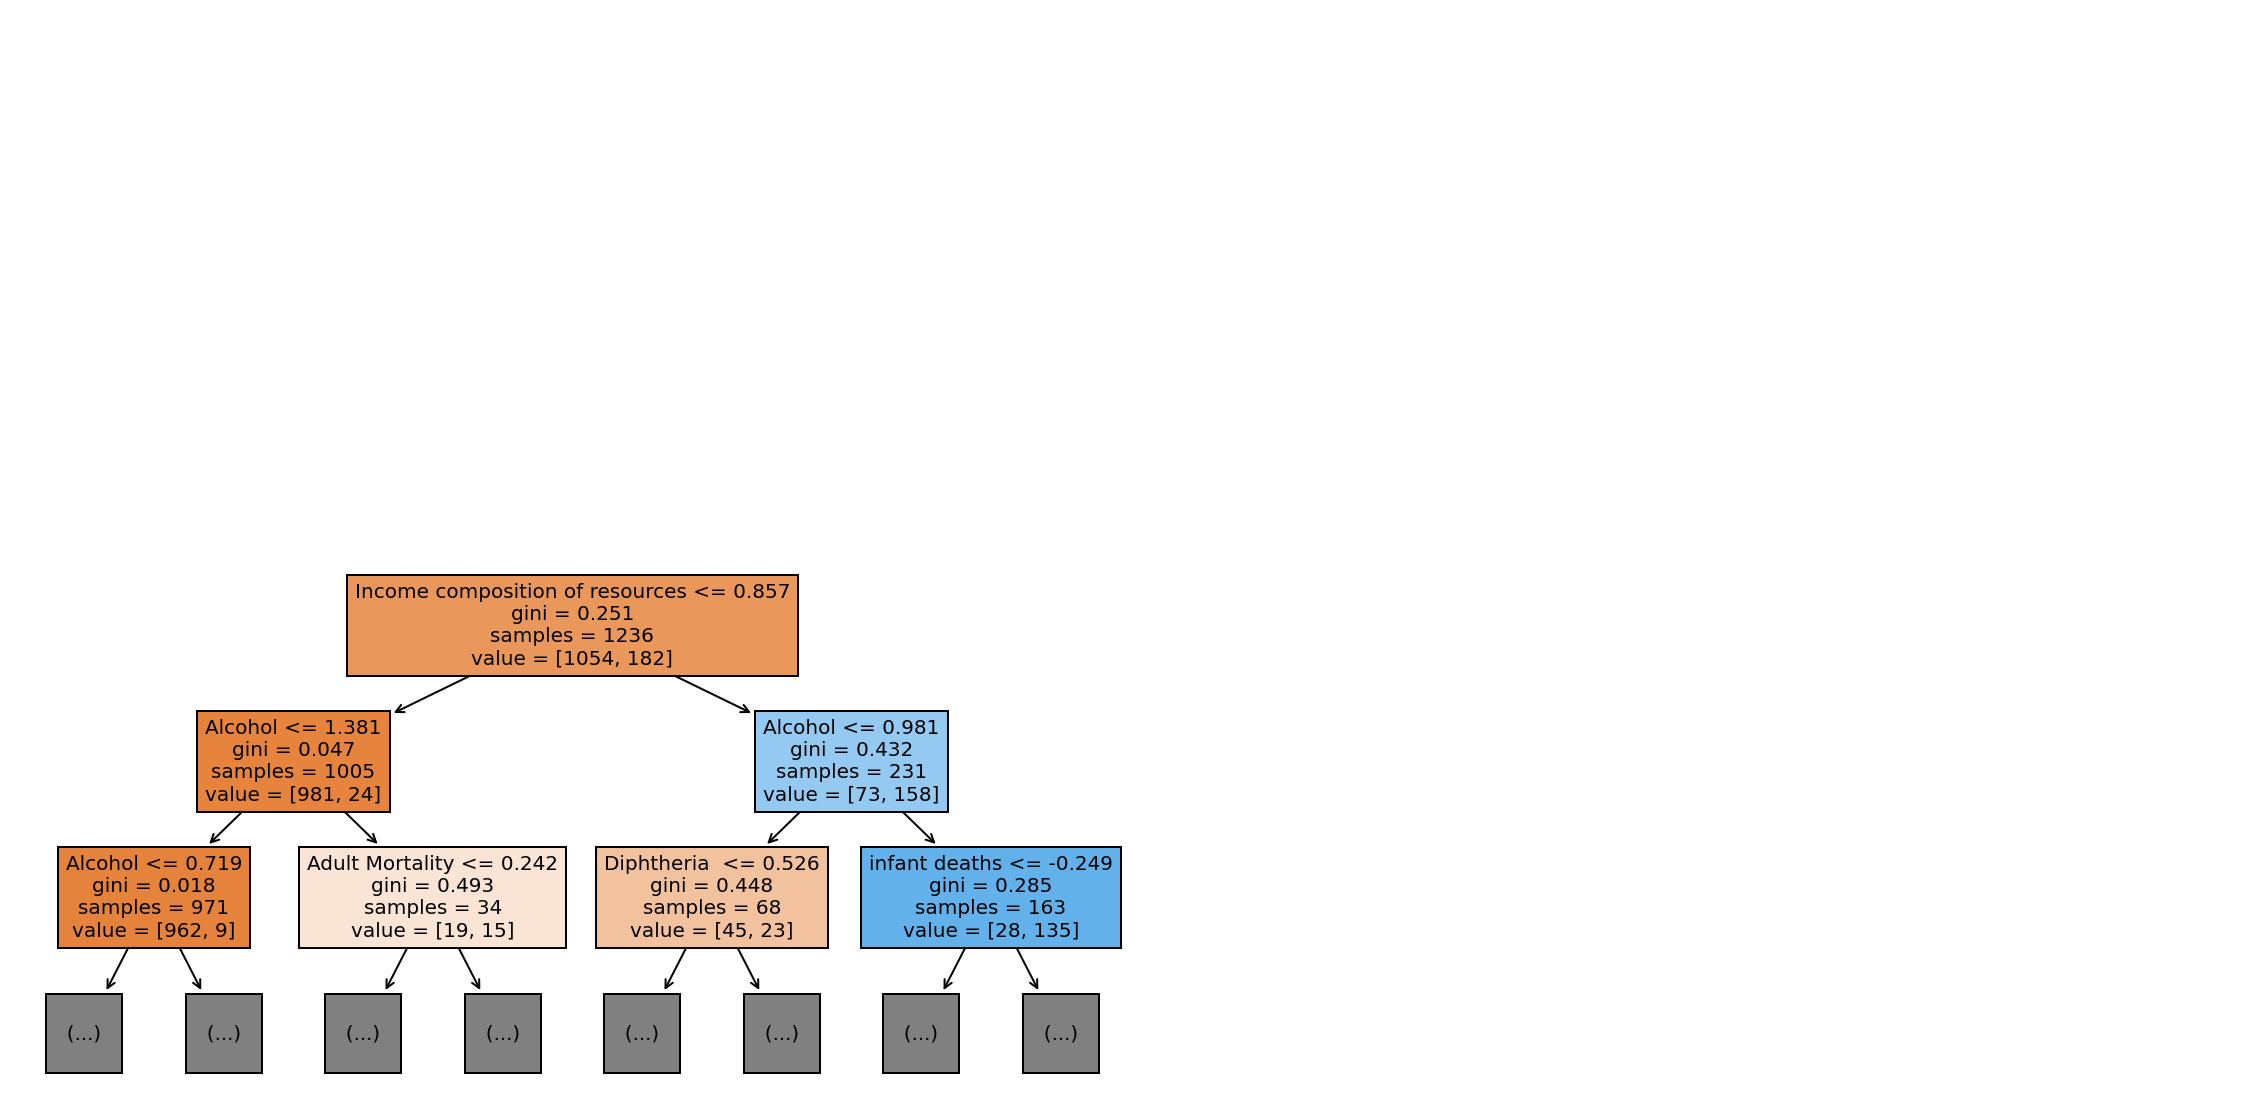

In [44]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(20,10))
# plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtc, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [ ]:
print(tree.export_text(dtc, feature_names=list(X.columns)))

|--- Income composition of resources <= 0.79
|   |--- Alcohol <= 1.31
|   |   |--- Alcohol <= 0.78
|   |   |   |--- Alcohol <= 0.64
|   |   |   |   |--- class: 0
|   |   |   |--- Alcohol >  0.64
|   |   |   |   |--- Alcohol <= 0.65
|   |   |   |   |   |--- GDP <= -0.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- GDP >  -0.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Alcohol >  0.65
|   |   |   |   |   |--- class: 0
|   |   |--- Alcohol >  0.78
|   |   |   |--- Hepatitis B <= 0.71
|   |   |   |   |--- Year <= -1.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Year >  -1.67
|   |   |   |   |   |--- class: 0
|   |   |   |--- Hepatitis B >  0.71
|   |   |   |   |--- Total expenditure <= -0.59
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Total expenditure >  -0.59
|   |   |   |   |   |--- class: 1
|   |--- Alcohol >  1.31
|   |   |--- Life expectancy  <= 0.15
|   |   |   |--- class: 0
|   |   |--- Life expectancy  >  0.15
|   |   |   |

## 랜덤 포레스트

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 
rfc.score(X_test, y_test).round(4)

0.9758

In [46]:
cross_validation(rfc,X,y)

0.9842

In [47]:
y_pred = rfc.predict(X_test)
show_clf_result(y_test, y_pred)

[[347   6]
 [  4  56]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       353
           1       0.90      0.93      0.92        60

    accuracy                           0.98       413
   macro avg       0.95      0.96      0.95       413
weighted avg       0.98      0.98      0.98       413



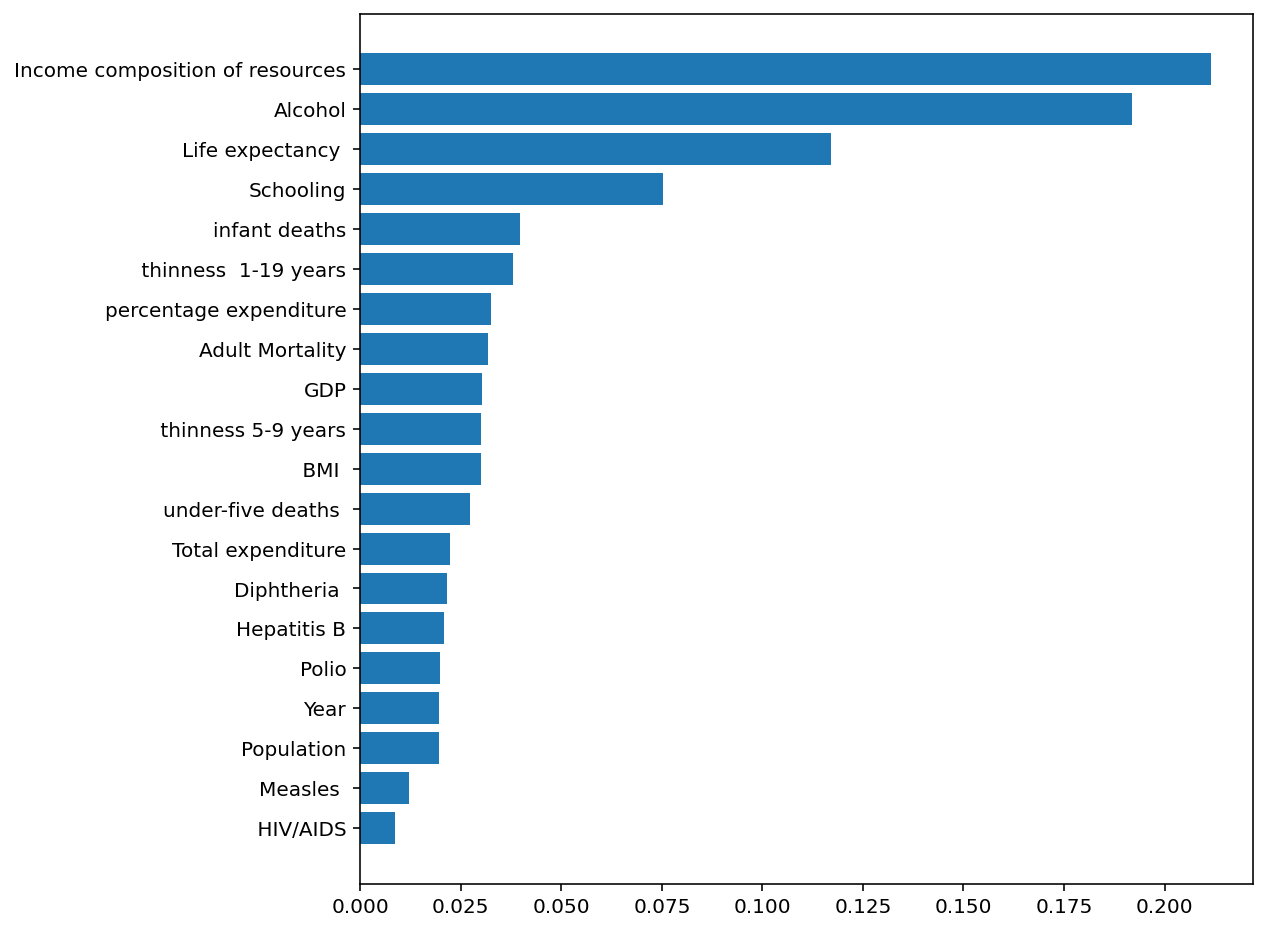

In [48]:
plot_feature_weight(X.columns, rfc.feature_importances_)

## 부스팅 (LightGBM)

In [49]:
lgbm_c = LGBMClassifier()
lgbm_c.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
lgbm_c.score(X_test, y_test)

0.9830508474576272

In [50]:
cross_validation(lgbm_c,X,y)

0.9897

In [51]:
y_pred = lgbm_c.predict(X_test)
show_clf_result(y_test, y_pred)

[[350   3]
 [  4  56]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       353
           1       0.95      0.93      0.94        60

    accuracy                           0.98       413
   macro avg       0.97      0.96      0.97       413
weighted avg       0.98      0.98      0.98       413



## 오분류된 샘플 찾기

- 0(개발도상국)을 1(개발국)으로 잘 못 분류한 경우

In [52]:
index_false = X_test[y_test < y_pred].index
print(index_false.size)
df.loc[index_false]

3


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1031,Greece,2010,0,83.0,76.0,0,9.00,3189.754439,95.0,149,63.7,0,99.0,9.18,99.0,0.1,26917.758980,11121341.0,0.8,0.7,0.859,16.4
226,Belarus,2013,0,71.7,23.0,0,14.66,1109.854619,98.0,16,61.1,1,98.0,6.70,98.0,0.1,7978.825443,9465997.0,2.0,2.0,0.796,15.7
1036,Greece,2005,0,79.3,81.0,0,9.95,2785.139364,93.0,122,6.5,1,96.0,9.36,96.0,0.1,22551.735740,1987314.0,0.8,0.7,0.839,15.6


## (연습) 개발국을 개발도상국으로 잘 못 분류한 경우

In [53]:
# (풀이)
index_false = X_test[y_test > y_pred].index
print(index_false.size)
df.loc[index_false]


4


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1644,Malta,2005,1,79.0,67.0,0,6.41,2247.035692,85.0,6,65.0,0,94.0,8.83,92.0,0.1,15835.34667,43834.0,0.7,0.7,0.805,14.8
1456,Latvia,2001,1,69.9,228.0,0,6.68,332.275171,96.0,1,55.7,0,97.0,6.17,97.0,0.1,3572.85130,233717.0,2.8,2.8,0.728,14.2
126,Australia,2001,1,79.9,75.0,1,9.53,3064.301144,94.0,141,59.0,2,91.0,8.18,92.0,0.1,19517.84168,19413.0,0.7,0.7,0.899,20.5
1283,Italy,2014,1,82.5,57.0,2,7.56,4831.644796,95.0,0,63.1,2,95.0,9.25,95.0,0.1,35396.66517,678914.0,0.6,0.6,0.877,16.3


# 정답

## (예제) 스케일링 하지 않으면 성능이 달라지는지 확인해보시오
- 입력 데이터를 스케일링 한 경우와 하지 않은 경우의 성능을 비교하시오
- 성능에 변화가 있는 모델은 어떤 모델인가?

In [ ]:
# 스케일링 하지 않는 X 사용하려면 train_test_split에서 X_sc 대신 X를 사용하면 된다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

## (연습) 개발국을 개발도상국으로 잘 못 분류한 경우

In [ ]:
index_false = X_test[y_test > y_pred].index
df.loc[index_false]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1523,Lithuania,2014,1,73.4,169.0,0,15.19,2211.744178,94.0,11,...,93.0,6.55,93.0,0.1,16554.97139,2932367.0,2.6,2.7,0.841,16.5
1456,Latvia,2001,1,69.9,228.0,0,6.68,332.275171,96.0,1,...,97.0,6.17,97.0,0.1,3572.85130,233717.0,2.8,2.8,0.728,14.2
2067,Portugal,2003,1,77.3,15.0,0,14.21,2283.891796,94.0,8,...,96.0,9.54,99.0,0.1,15772.73340,1458821.0,0.7,0.6,0.789,15.8
2120,Romania,2014,1,74.8,135.0,2,0.01,1.576409,94.0,59,...,94.0,5.57,94.0,0.1,12.27733,1998979.0,2.6,2.8,0.797,14.7
1525,Lithuania,2012,1,73.0,176.0,0,15.14,1807.071336,93.0,0,...,93.0,6.67,93.0,0.1,14341.83600,2987773.0,2.7,2.7,0.830,16.5
1524,Lithuania,2013,1,73.0,178.0,0,15.04,1968.816817,93.0,35,...,93.0,6.59,93.0,0.1,15712.82376,2957689.0,2.7,2.7,0.834,16.4
